## ANSWERING BUSINESS QUESTIONS

1. What are the dominant transport modes (road, rail, air, water) over time, and how do their freight volumes compare annually and monthly?
- 1.1. How does the distribution of freight volume vary by commodity type over time and mode?
-  1.2 Which origin-destination (OD) pairs or corridors have the highest freight movement, and how have they changed over time?

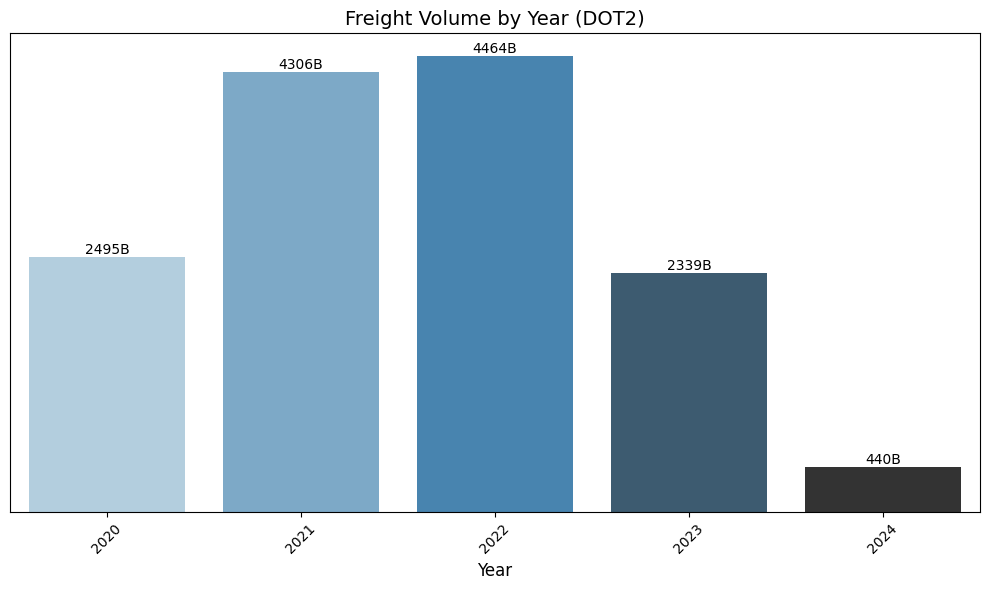

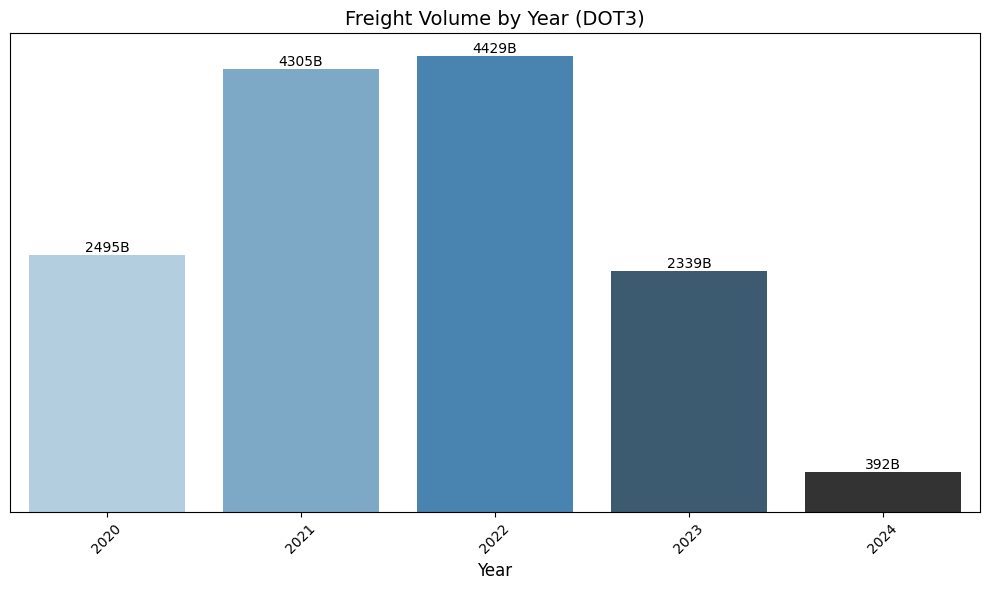

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def format_large_number(num):
    """Formats numbers into human-readable format."""
    if num >= 1e9:
        return f'{num / 1e9:.0f}B'
    elif num >= 1e6:
        return f'{num / 1e6:.0f}M'
    elif num >= 1e3:
        return f'{num / 1e3:.0f}K'
    else:
        return str(int(num))

def plot_freight_volume_by_year(file, title):
    data = pd.read_csv(file, usecols=['YEAR', 'SHIPWT'], low_memory=False)
    data = data.dropna(subset=['YEAR', 'SHIPWT'])
    data['YEAR'] = data['YEAR'].astype(int)

    yearly = data.groupby('YEAR')['SHIPWT'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=yearly, x='YEAR', y='SHIPWT', hue='YEAR', palette='Blues_d', legend=False)

    # Add formatted labels to each bar
    for p in ax.patches:
        height = p.get_height()
        label = format_large_number(height)
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Remove y-axis labels and ticks for clarity
    ax.set_yticks([])
    ax.set_ylabel('')  # remove axis label

    plt.title(f'Freight Volume by Year ({title})', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Run for your datasets
plot_freight_volume_by_year('deduped_dot2.csv', 'DOT2')
plot_freight_volume_by_year('deduped_dot3.csv', 'DOT3')



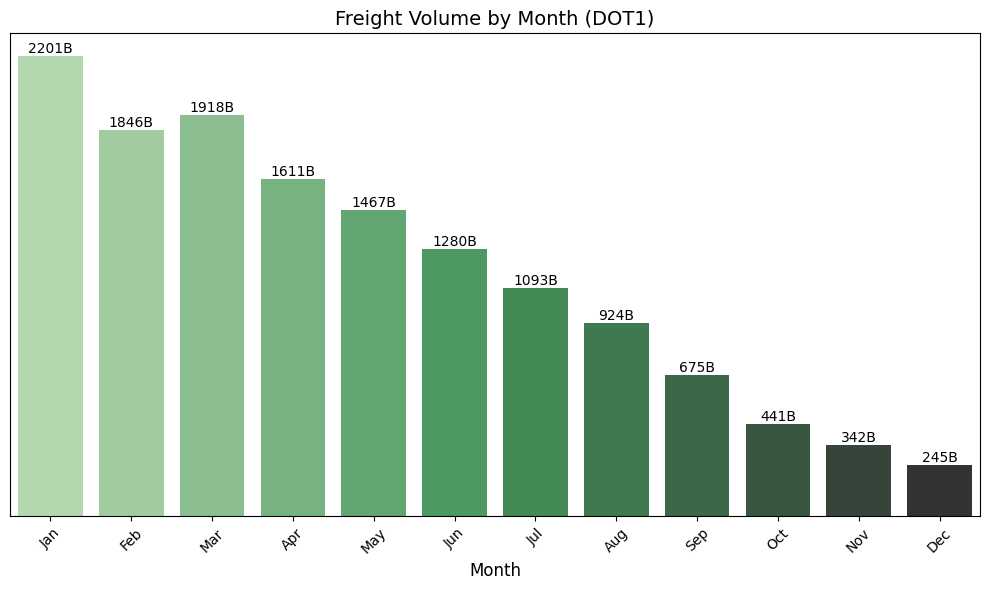

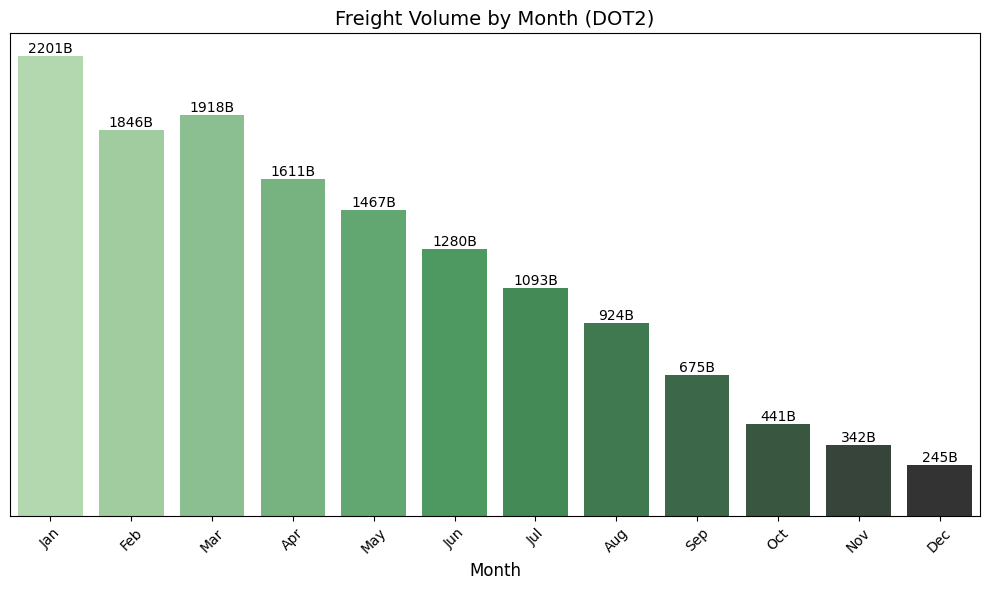

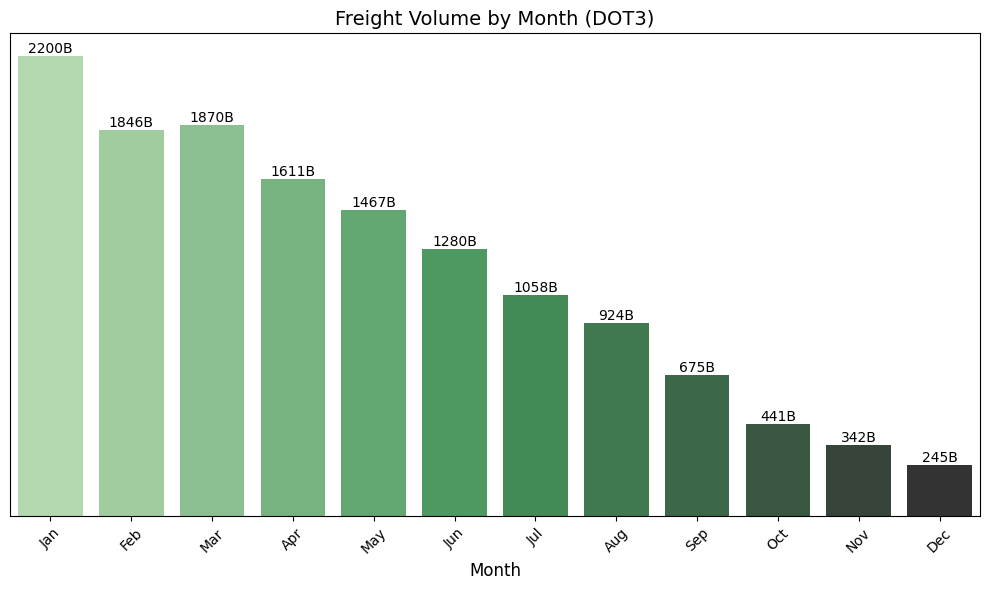

In [2]:
#Monthly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def format_large_number(num):
    """Formats numbers into human-readable format like 3M, 40B."""
    if num >= 1e9:
        return f'{num / 1e9:.0f}B'
    elif num >= 1e6:
        return f'{num / 1e6:.0f}M'
    elif num >= 1e3:
        return f'{num / 1e3:.0f}K'
    else:
        return str(int(num))

def plot_freight_volume_by_month(file, title):
    # Load only necessary columns
    data = pd.read_csv(file, usecols=['MONTH', 'SHIPWT'], low_memory=False)
    data = data.dropna(subset=['MONTH', 'SHIPWT'])

    # Ensure proper types
    data['MONTH'] = data['MONTH'].astype(int)
    data['SHIPWT'] = pd.to_numeric(data['SHIPWT'], errors='coerce')
    data = data.dropna()

    # Group and aggregate
    monthly = data.groupby('MONTH')['SHIPWT'].sum().reset_index()

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=monthly, x='MONTH', y='SHIPWT', hue='MONTH', palette='Greens_d', legend=False)

    # Add human-readable data labels
    for p in ax.patches:
        height = p.get_height()
        label = format_large_number(height)
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Remove y-axis ticks and label
    ax.set_yticks([])
    ax.set_ylabel('')  # remove label

    # Custom x-axis labels
    plt.title(f'Freight Volume by Month ({title})', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.xticks(
        range(0, 12),
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=45
    )
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Run on all three datasets
plot_freight_volume_by_month('deduped_dot1.csv', 'DOT1')
plot_freight_volume_by_month('deduped_dot2.csv', 'DOT2')
plot_freight_volume_by_month('deduped_dot3.csv', 'DOT3')



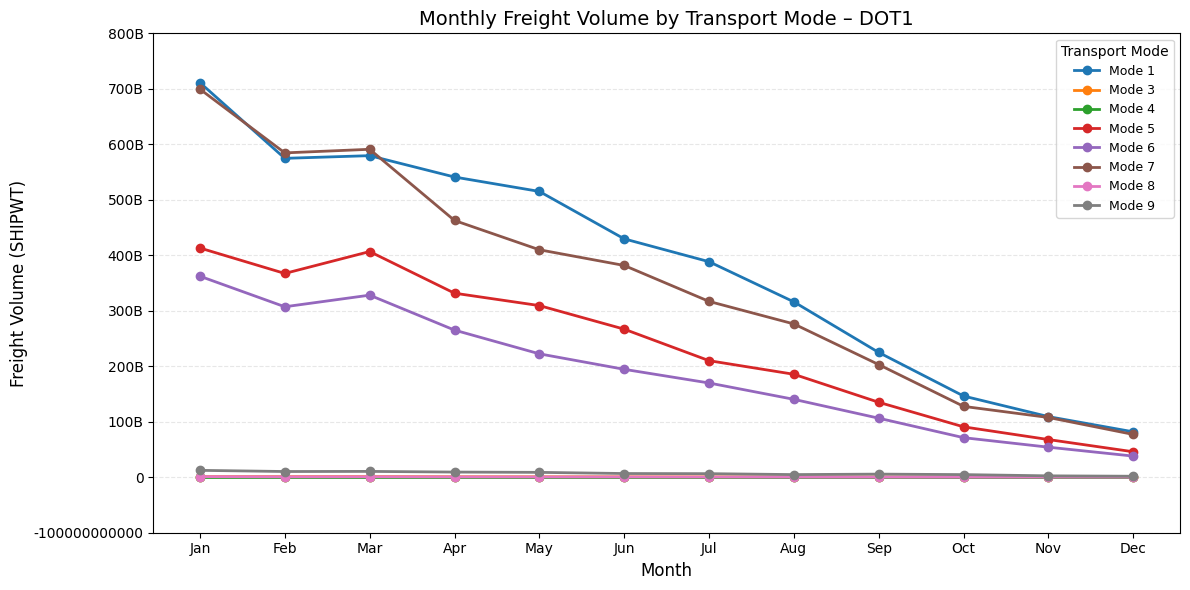

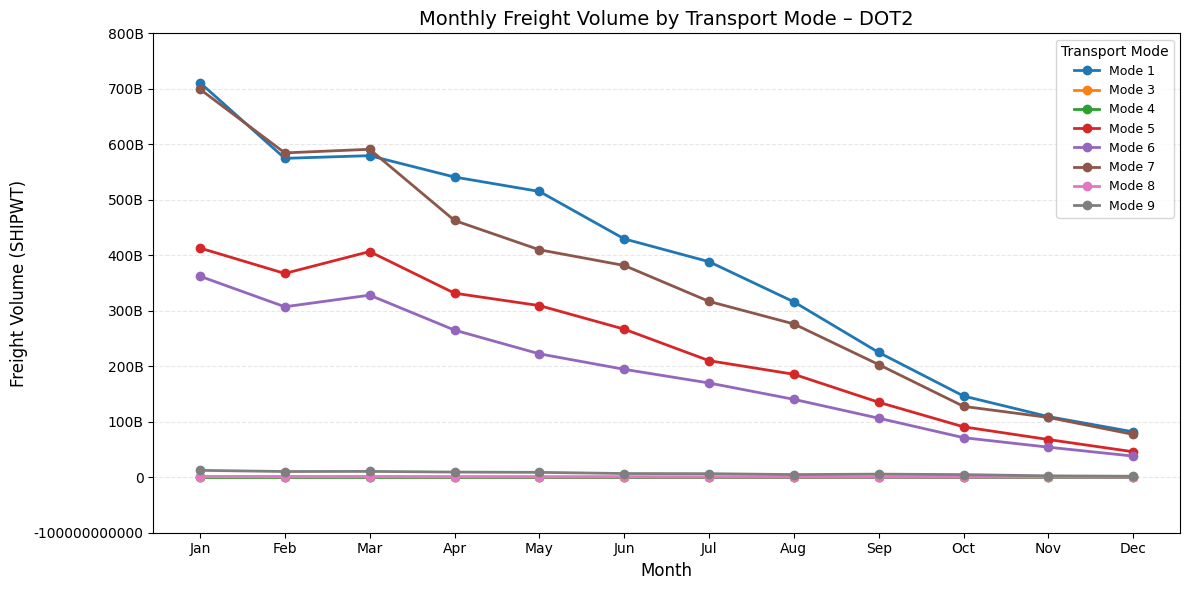

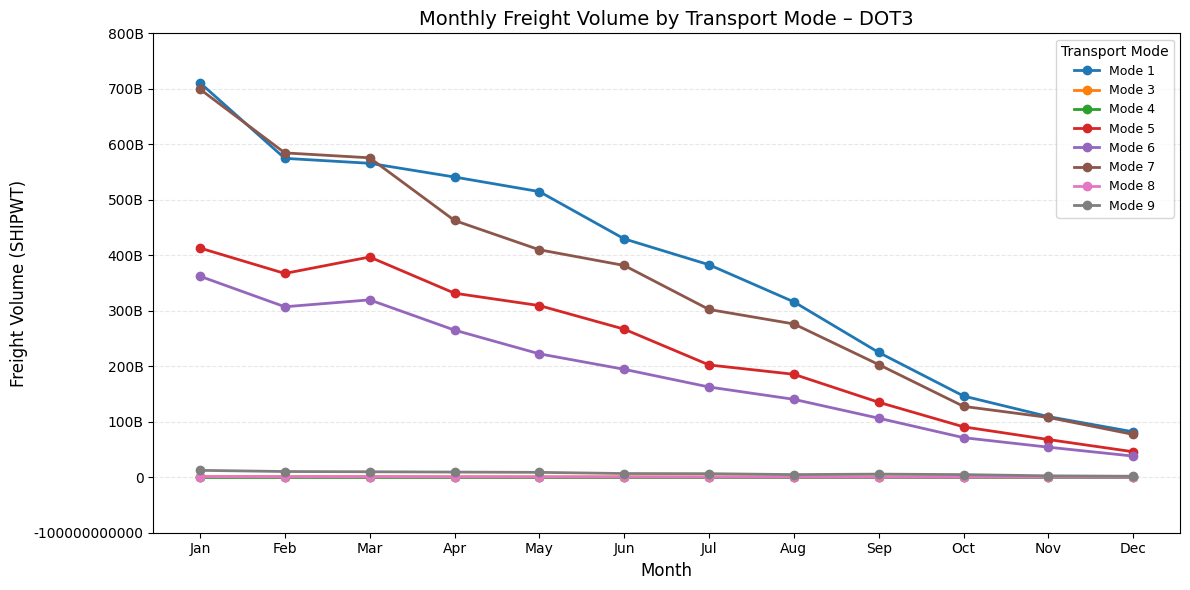

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

def format_large_number(num):
    """Format large numbers like 3M, 40B."""
    if num >= 1e9:
        return f'{num / 1e9:.0f}B'
    elif num >= 1e6:
        return f'{num / 1e6:.0f}M'
    elif num >= 1e3:
        return f'{num / 1e3:.0f}K'
    else:
        return str(int(num))

def plot_monthly_freight_by_mode(file, title):
    # Load data
    df = pd.read_csv(file, usecols=['MONTH', 'SHIPWT', 'DISAGMOT'])
    df = df.dropna(subset=['MONTH', 'SHIPWT', 'DISAGMOT'])

    # Convert types
    df['MONTH'] = df['MONTH'].astype(int)
    df['SHIPWT'] = pd.to_numeric(df['SHIPWT'], errors='coerce')
    df['DISAGMOT'] = df['DISAGMOT'].astype(str)
    df = df.dropna()

    # Group and pivot
    monthly_grouped = df.groupby(['MONTH', 'DISAGMOT'])['SHIPWT'].sum().reset_index()
    pivot_df = monthly_grouped.pivot(index='MONTH', columns='DISAGMOT', values='SHIPWT').fillna(0)

    # Plot setup
    fig, ax = plt.subplots(figsize=(12, 6))
    color_cycle = plt.get_cmap('tab10').colors  

    for i, col in enumerate(pivot_df.columns):
        ax.plot(pivot_df.index, pivot_df[col],
                label=f'Mode {col}',
                color=color_cycle[i % len(color_cycle)],
                marker='o',
                linewidth=2)

    # Set x-axis ticks
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Format y-axis with custom labels
    ax.set_ylabel('Freight Volume (SHIPWT)', fontsize=12)
    ax.set_yticks(ax.get_yticks())  # ensure ticks are shown
    ax.set_yticklabels([format_large_number(y) for y in ax.get_yticks()])

    # Add labels and grid
    ax.set_xlabel('Month', fontsize=12)
    ax.set_title(f'Monthly Freight Volume by Transport Mode – {title}', fontsize=14)
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)

    # Legend
    ax.legend(title='Transport Mode', loc='best', fontsize=9)

    plt.tight_layout()
    plt.show()

# usage
plot_monthly_freight_by_mode('deduped_dot1.csv', 'DOT1')
plot_monthly_freight_by_mode('deduped_dot2.csv', 'DOT2')
plot_monthly_freight_by_mode('deduped_dot3.csv', 'DOT3')



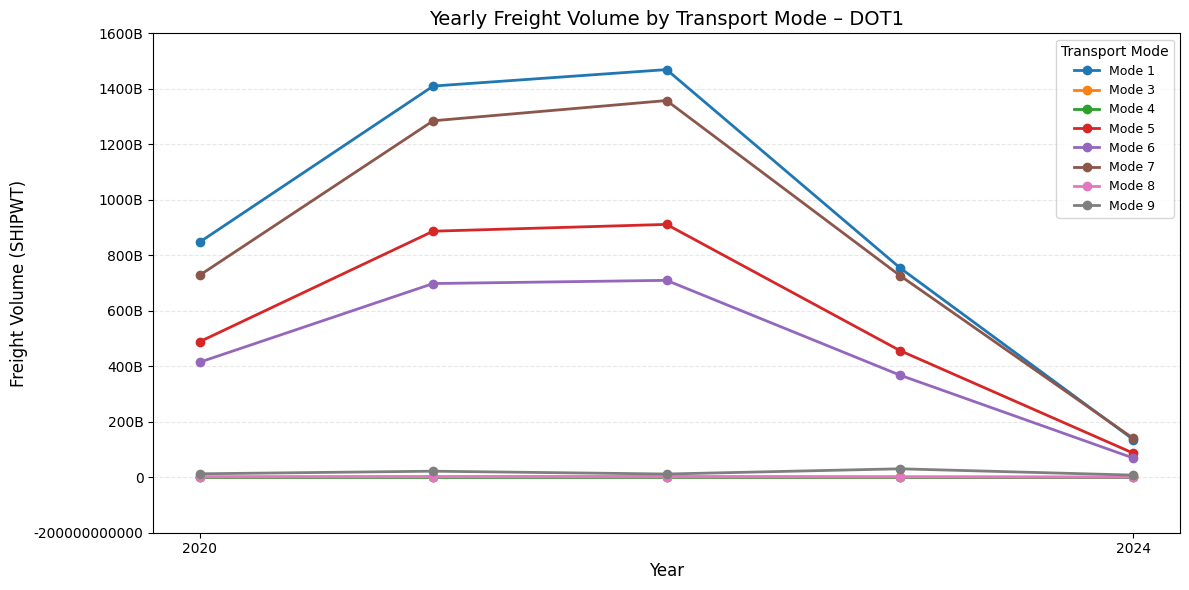

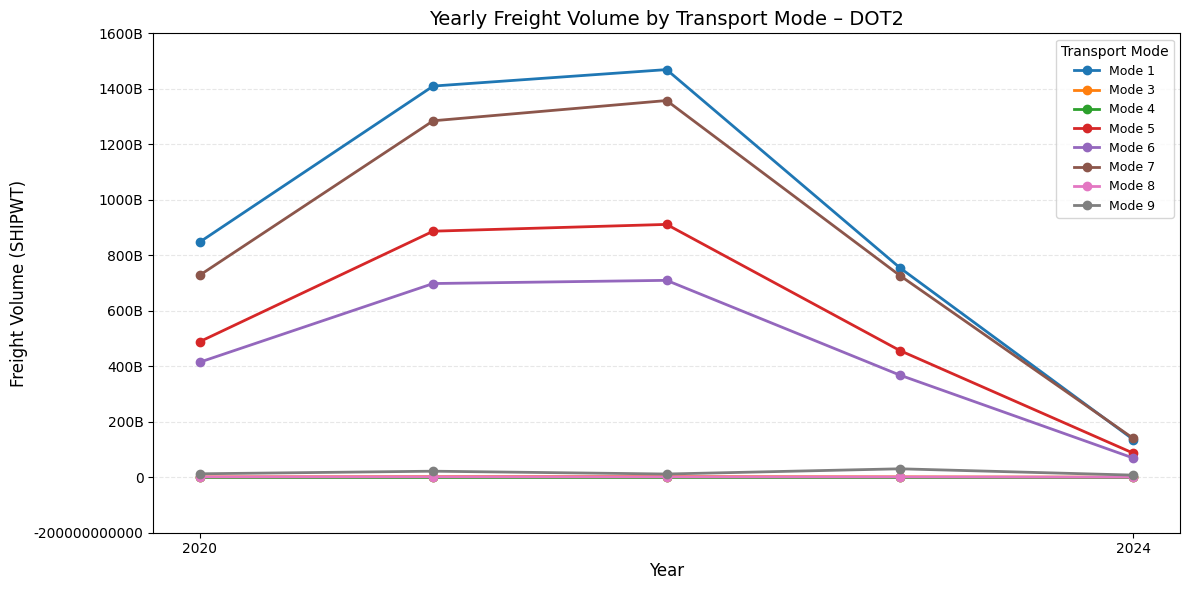

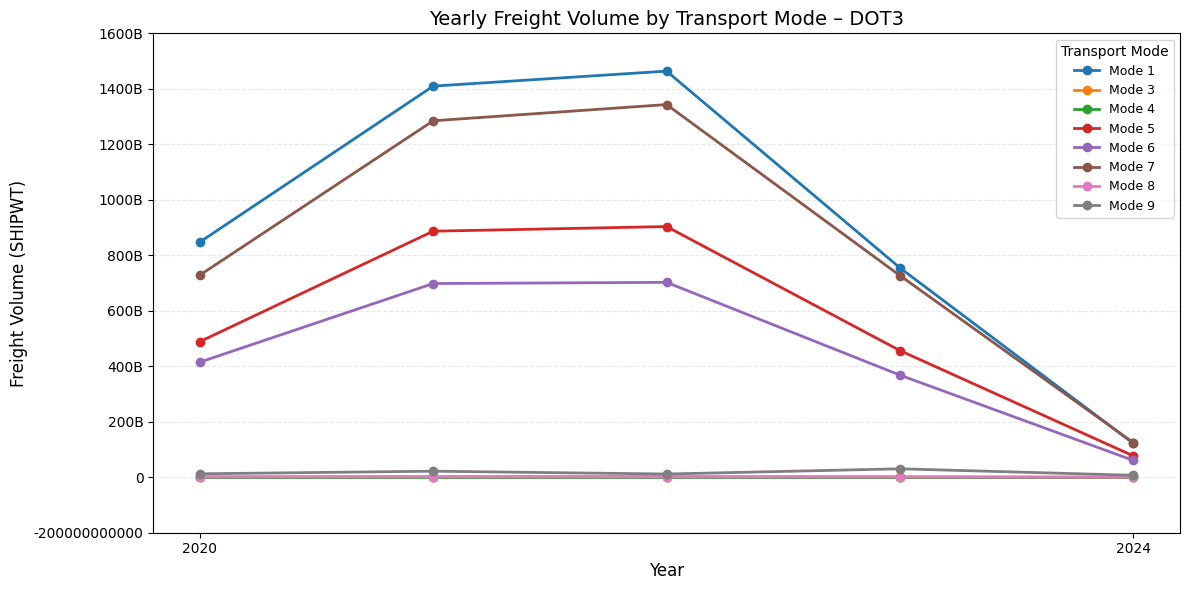

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def format_large_number(num):
    """Formats numbers like 3M, 40B, etc."""
    if num >= 1e9:
        return f'{num / 1e9:.0f}B'
    elif num >= 1e6:
        return f'{num / 1e6:.0f}M'
    elif num >= 1e3:
        return f'{num / 1e3:.0f}K'
    else:
        return str(int(num))

def plot_yearly_freight_by_mode(file, title):
    # Load and clean data
    df = pd.read_csv(file, usecols=['YEAR', 'SHIPWT', 'DISAGMOT'])
    df = df.dropna(subset=['YEAR', 'SHIPWT', 'DISAGMOT'])

    df['YEAR'] = df['YEAR'].astype(int)
    df['SHIPWT'] = pd.to_numeric(df['SHIPWT'], errors='coerce')
    df['DISAGMOT'] = df['DISAGMOT'].astype(str)
    df = df.dropna()

    # Aggregate and pivot
    grouped = df.groupby(['YEAR', 'DISAGMOT'])['SHIPWT'].sum().reset_index()
    pivot_df = grouped.pivot(index='YEAR', columns='DISAGMOT', values='SHIPWT').fillna(0)

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    color_cycle = plt.get_cmap('tab10').colors

    for i, col in enumerate(pivot_df.columns):
        ax.plot(pivot_df.index, pivot_df[col],
                label=f'Mode {col}',
                color=color_cycle[i % len(color_cycle)],
                marker='o',
                linewidth=2)

    # Format x-axis to show only first and last year
    year_range = pivot_df.index.tolist()
    ax.set_xticks([year_range[0], year_range[-1]])
    ax.set_xticklabels([str(year_range[0]), str(year_range[-1])])

    # Format y-axis labels
    ax.set_yticks(ax.get_yticks())  # ensure ticks are shown
    ax.set_yticklabels([format_large_number(y) for y in ax.get_yticks()])

    # Final touches
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Freight Volume (SHIPWT)', fontsize=12)
    ax.set_title(f'Yearly Freight Volume by Transport Mode – {title}', fontsize=14)
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)
    ax.legend(title='Transport Mode', loc='best', fontsize=9)
    plt.tight_layout()
    plt.show()

#  usage
plot_yearly_freight_by_mode('deduped_dot1.csv', 'DOT1')
plot_yearly_freight_by_mode('deduped_dot2.csv', 'DOT2')
plot_yearly_freight_by_mode('deduped_dot3.csv', 'DOT3')


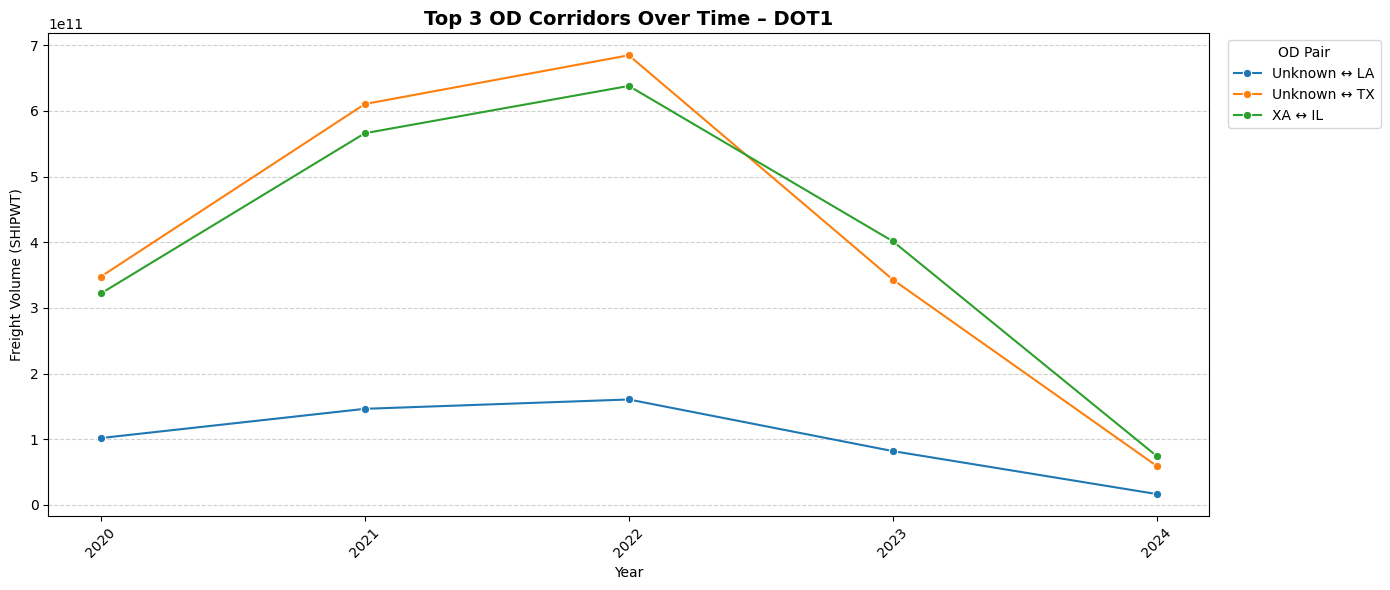

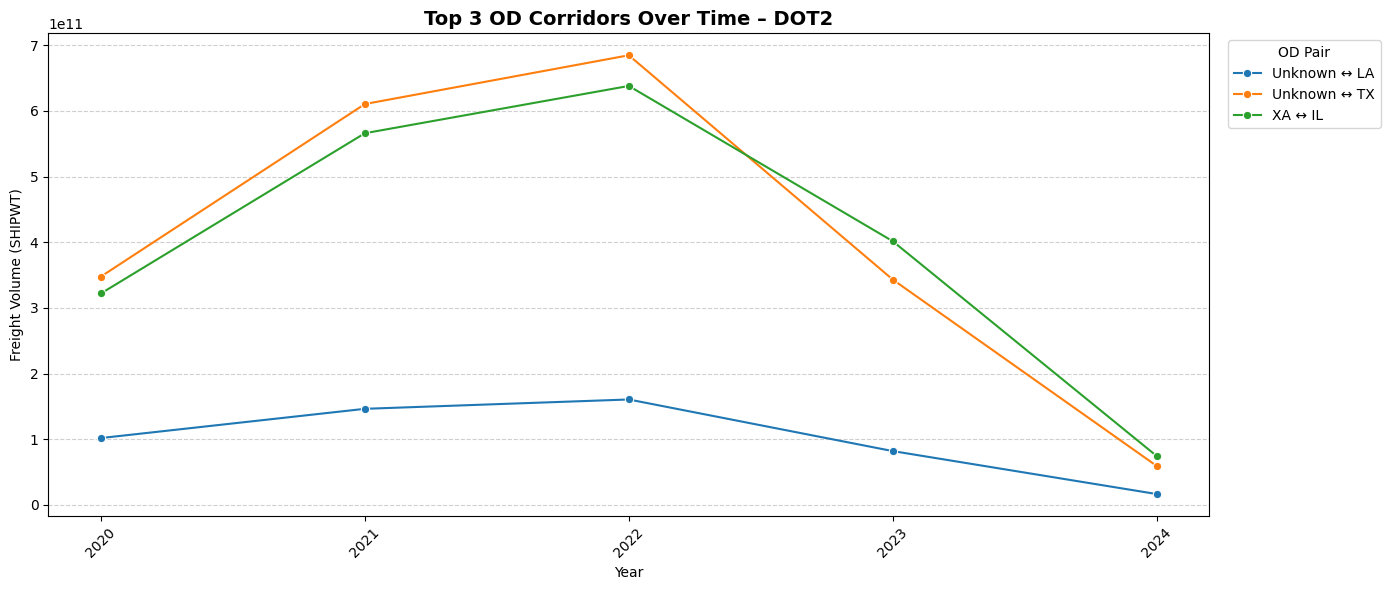

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def top_od_corridors_by_year(file, title, top_n=3, chunk_size=100_000):
    cols = ['CANPROV', 'USASTATE', 'YEAR', 'SHIPWT']
    od_data = pd.DataFrame()

    for chunk in pd.read_csv(file, usecols=cols, chunksize=chunk_size, low_memory=False):
        chunk.dropna(subset=['CANPROV', 'USASTATE', 'YEAR', 'SHIPWT'], inplace=True)
        chunk['YEAR'] = pd.to_numeric(chunk['YEAR'], errors='coerce').astype('Int64')
        chunk['SHIPWT'] = pd.to_numeric(chunk['SHIPWT'], errors='coerce')
        chunk.dropna(inplace=True)

        chunk['OD_PAIR'] = chunk['CANPROV'].astype(str) + ' ↔ ' + chunk['USASTATE'].astype(str)
        g = chunk.groupby(['YEAR', 'OD_PAIR'])['SHIPWT'].sum().reset_index()
        od_data = pd.concat([od_data, g], ignore_index=True)

    final = od_data.groupby(['YEAR', 'OD_PAIR'])['SHIPWT'].sum().reset_index()

    # Ensure YEAR is integer (not Int64) and sort
    final['YEAR'] = final['YEAR'].astype(int)
    final.sort_values('YEAR', inplace=True)

    # Get top N OD pairs by total weight
    top_pairs = final.groupby('OD_PAIR')['SHIPWT'].sum().nlargest(top_n).index
    top_final = final[final['OD_PAIR'].isin(top_pairs)]

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=top_final, x='YEAR', y='SHIPWT', hue='OD_PAIR', marker='o')
    plt.title(f'Top {top_n} OD Corridors Over Time – {title}', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Freight Volume (SHIPWT)')
    
    # Show only unique sorted years as integers
    years = sorted(top_final['YEAR'].unique())
    plt.xticks(ticks=years, labels=[str(y) for y in years], rotation=45)

    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='OD Pair', bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


top_od_corridors_by_year('deduped_dot1.csv', 'DOT1')
top_od_corridors_by_year('deduped_dot2.csv', 'DOT2')


2. Which commodities contribute the most to freight value and volume across different trade partners (US, Canada, Mexico)?

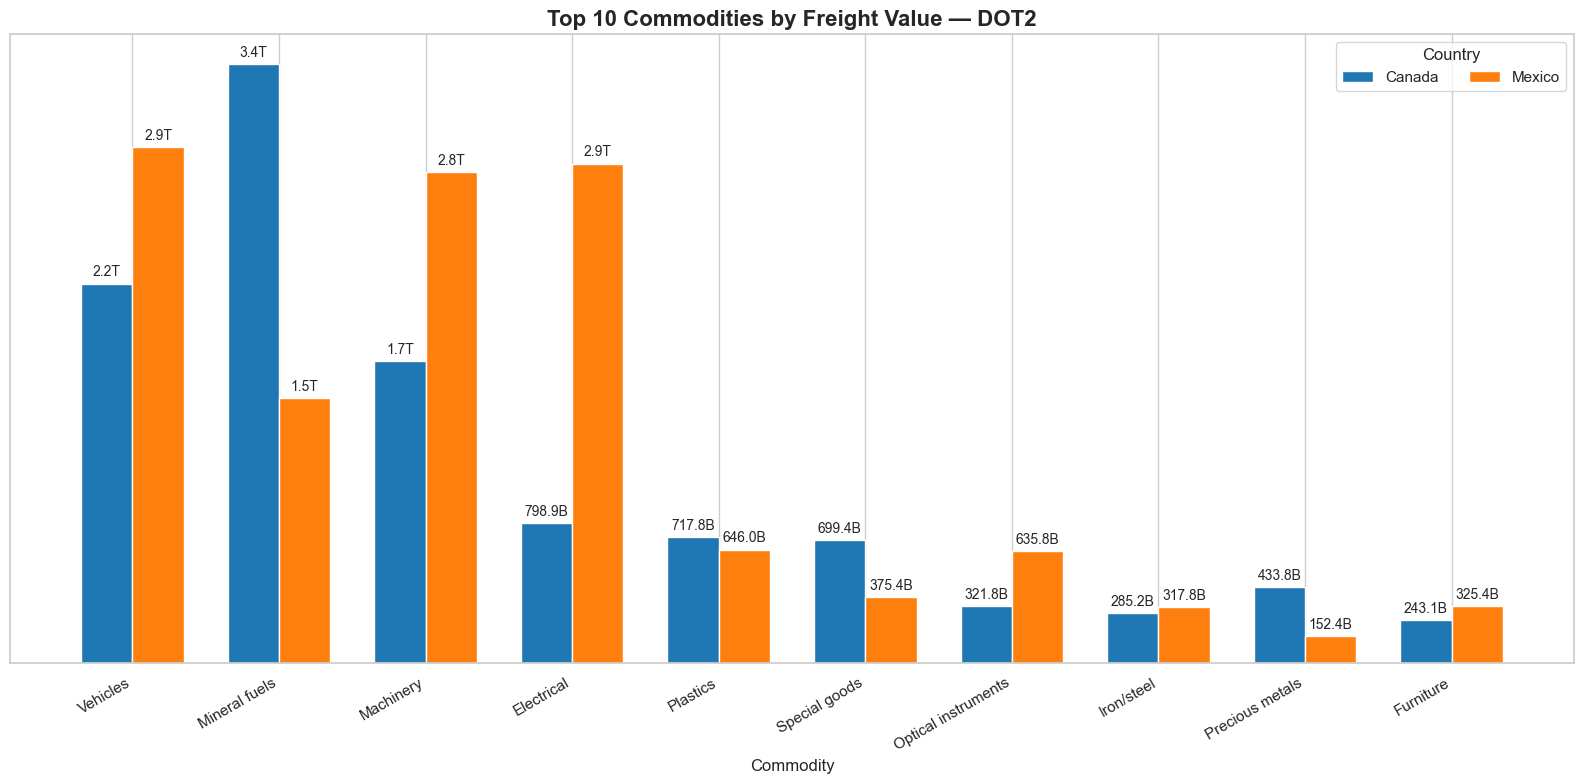

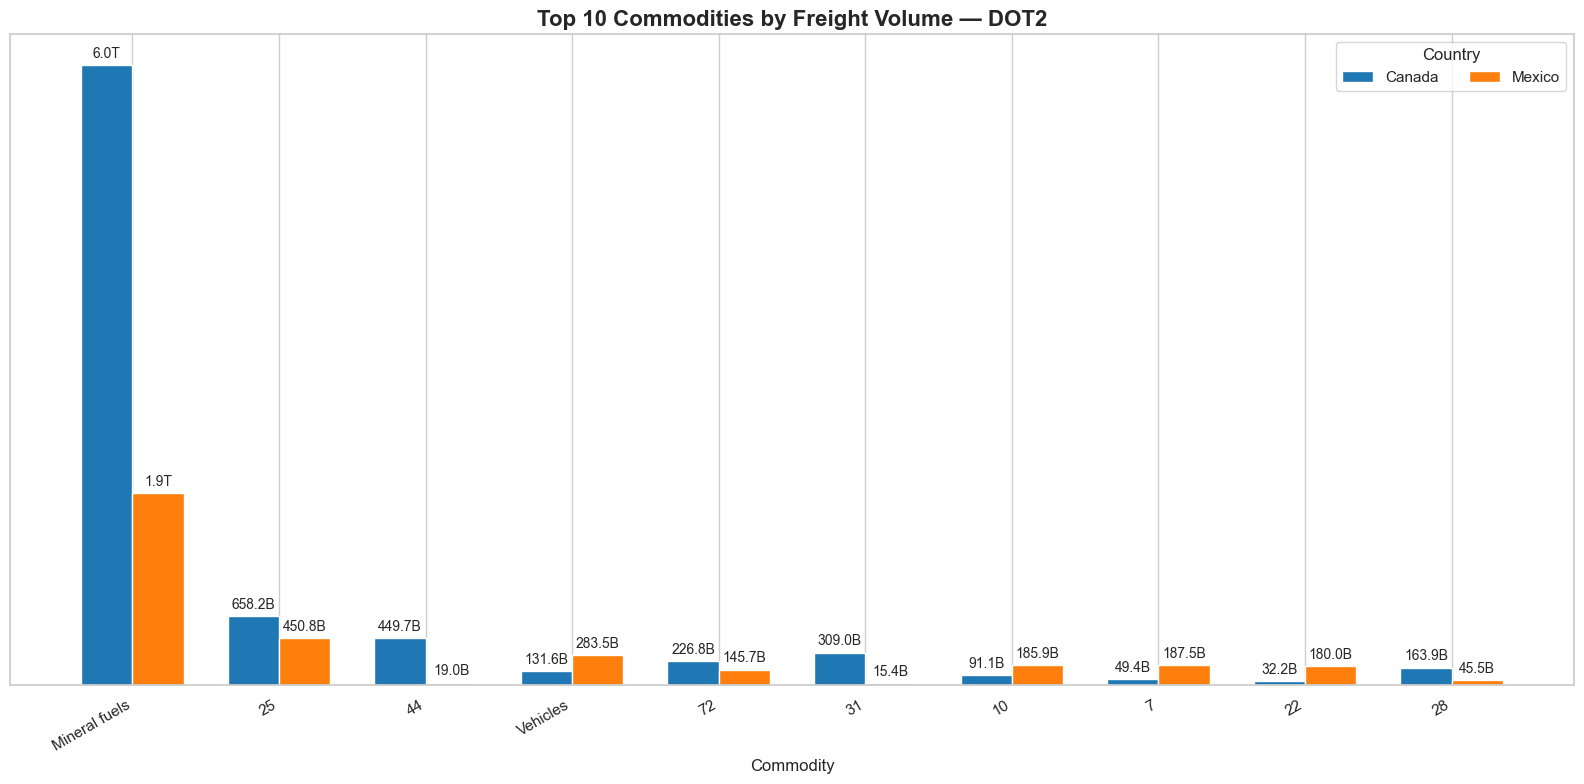

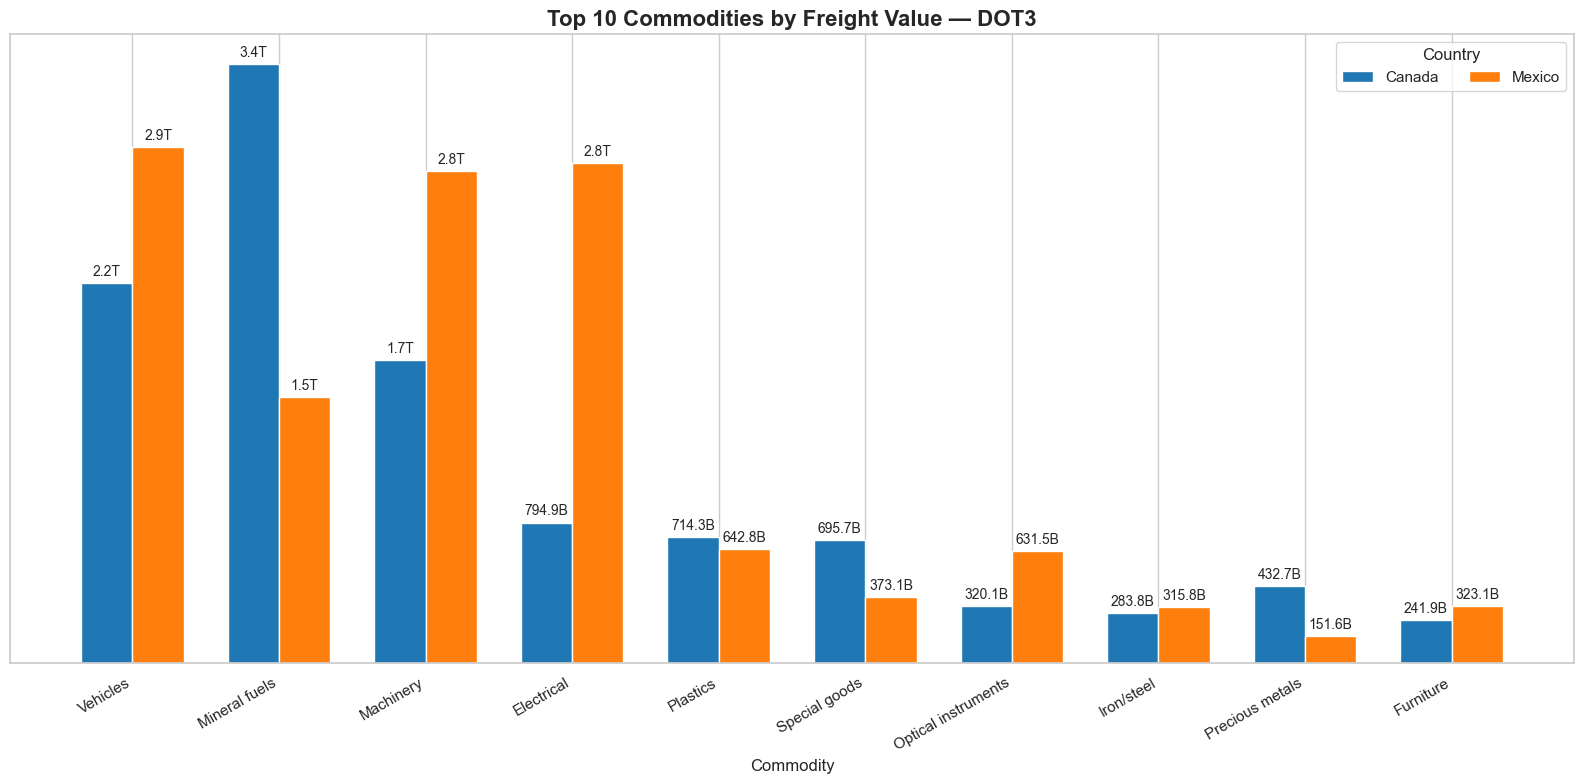

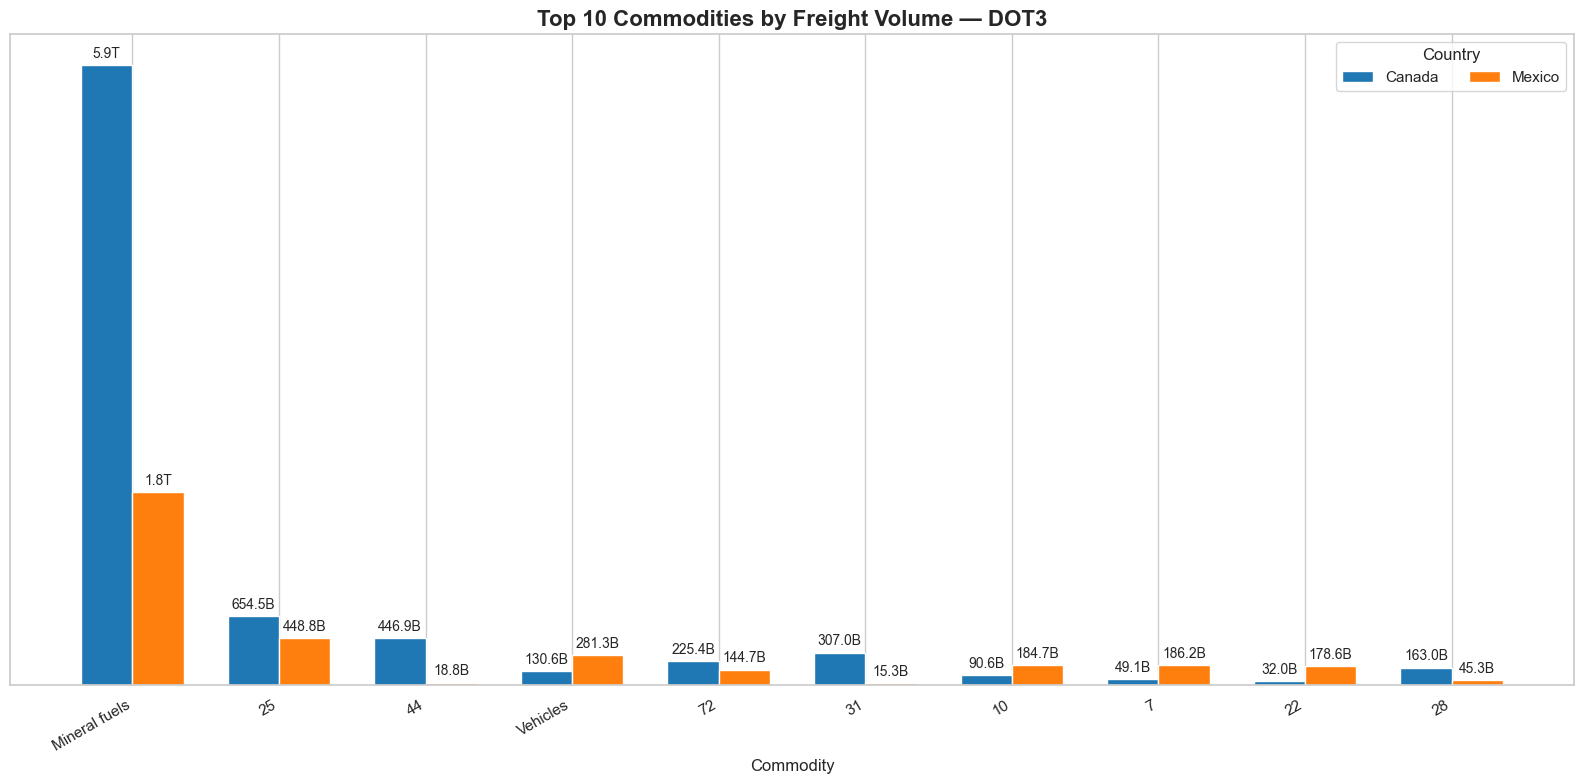

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# -----------------------
# Helpers
# -----------------------
def format_large_number(num: float) -> str:
    if num is None or pd.isna(num):
        return "0"
    n = float(num)
    abs_n = abs(n)
    if abs_n >= 1e12:
        return f"{n/1e12:.1f}T"
    if abs_n >= 1e9:
        return f"{n/1e9:.1f}B"
    if abs_n >= 1e6:
        return f"{n/1e6:.1f}M"
    if abs_n >= 1e3:
        return f"{n/1e3:.1f}K"
    return f"{n:.0f}"

# Format y-axis numbers
def yfmt(x, pos):
    return format_large_number(x)

# Country display & color palette
COUNTRY_LABELS = {"1220": "Canada", "2010": "Mexico"}
COUNTRY_ORDER = ["1220", "2010"]
PALETTE = {"1220": "#1f77b4", "2010": "#ff7f0e"}

# HS code → short commodity name mapping
HS_CODE_MAP = {
    "87": "Vehicles",
    "27": "Mineral fuels",
    "84": "Machinery",
    "85": "Electrical",
    "39": "Plastics",
    "98": "Special goods",
    "90": "Optical instruments",
    "73": "Iron/steel",
    "71": "Precious metals",
    "94": "Furniture"
}

# -----------------------
# Data loading and summarizing
# -----------------------
def load_summary(file, chunk_size=200_000):
    usecols = ["COMMODITY2", "DISAGMOT", "COUNTRY", "VALUE", "SHIPWT"]
    df_all = []
    for chunk in pd.read_csv(file, usecols=usecols, chunksize=chunk_size, low_memory=False):
        chunk = chunk.dropna(subset=["COMMODITY2", "COUNTRY"])
        # coerce numeric
        for col in ["VALUE", "SHIPWT"]:
            chunk[col] = pd.to_numeric(chunk[col], errors="coerce")
        chunk = chunk.dropna(subset=["VALUE", "SHIPWT"])
        df_all.append(chunk)
    df = pd.concat(df_all, ignore_index=True) if df_all else pd.DataFrame(columns=usecols)
    summary = (df
               .groupby(["COMMODITY2", "COUNTRY"], as_index=False)
               .agg(Total_Value=("VALUE", "sum"),
                    Total_Volume=("SHIPWT", "sum")))
    summary = summary[summary["COUNTRY"].astype(str).isin(COUNTRY_ORDER)]
    summary["COMMODITY2"] = summary["COMMODITY2"].astype(str)
    summary["COUNTRY"] = summary["COUNTRY"].astype(str)
    return summary

def pick_top(summary: pd.DataFrame, metric: str, top_n=10):
    totals = (summary.groupby("COMMODITY2", as_index=False)[metric].sum()
              .sort_values(metric, ascending=False)
              .head(top_n))
    keep = totals["COMMODITY2"].tolist()
    subset = summary[summary["COMMODITY2"].isin(keep)].copy()
    subset["order"] = subset["COMMODITY2"].map({c: i for i, c in enumerate(keep)})
    return subset.sort_values(["order", "COUNTRY"])

# -----------------------
# Plotting
# -----------------------
def plot_grouped_bars(data: pd.DataFrame, metric: str, title: str):
    commodities = data["COMMODITY2"].unique().tolist()
    n = len(commodities)
    width = 0.35
    x = range(n)

    fig, ax = plt.subplots(figsize=(16, 8))
    for i, country in enumerate(COUNTRY_ORDER):
        series = data[data["COUNTRY"] == country]
        vals = []
        for c in commodities:
            v = series.loc[series["COMMODITY2"] == c, metric]
            vals.append(float(v.iloc[0]) if not v.empty else 0.0)
        offsets = [xi + (i - 0.5) * width for xi in x]
        bars = ax.bar(offsets, vals, width=width,
                      label=COUNTRY_LABELS[country],
                      color=PALETTE[country])
        for bar in bars:
            h = bar.get_height()
            if h > 0:
                ax.annotate(format_large_number(h),
                            xy=(bar.get_x() + bar.get_width() / 2, h),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha="center", va="bottom", fontsize=10)

    # Cosmetic adjustments
    ax.set_xticks(list(x))
    ax.set_xticklabels([HS_CODE_MAP.get(c, c) for c in commodities], rotation=30, ha="right", fontsize=11)
    ax.yaxis.set_major_formatter(FuncFormatter(yfmt))
    ax.grid(axis="y", linestyle="--", alpha=0.4)
    ax.set_xlabel("Commodity", fontsize=12)
    ax.set_ylabel("")  # remove y-axis label
    ax.set_yticks([])  # remove y-axis ticks
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.legend(title="Country", ncols=2, frameon=True)
    fig.tight_layout()
    plt.show()

# -----------------------
# Main
# -----------------------
def analyze_and_display(file, title, top_n=10):
    summary = load_summary(file)
    if summary.empty:
        print(f"[{title}] No rows after cleaning.")
        return
    top_by_value = pick_top(summary, "Total_Value", top_n=top_n)
    top_by_volume = pick_top(summary, "Total_Volume", top_n=top_n)

    plot_grouped_bars(top_by_value, "Total_Value",
                      f"Top {top_n} Commodities by Freight Value — {title}")
    plot_grouped_bars(top_by_volume, "Total_Volume",
                      f"Top {top_n} Commodities by Freight Volume — {title}")

# Run for both files
analyze_and_display("deduped_dot2.csv", "DOT2", top_n=10)
analyze_and_display("deduped_dot3.csv", "DOT3", top_n=10)


3. Which origin-destination (OD) corridors handle the largest freight volumes, and how have these patterns changed over time?

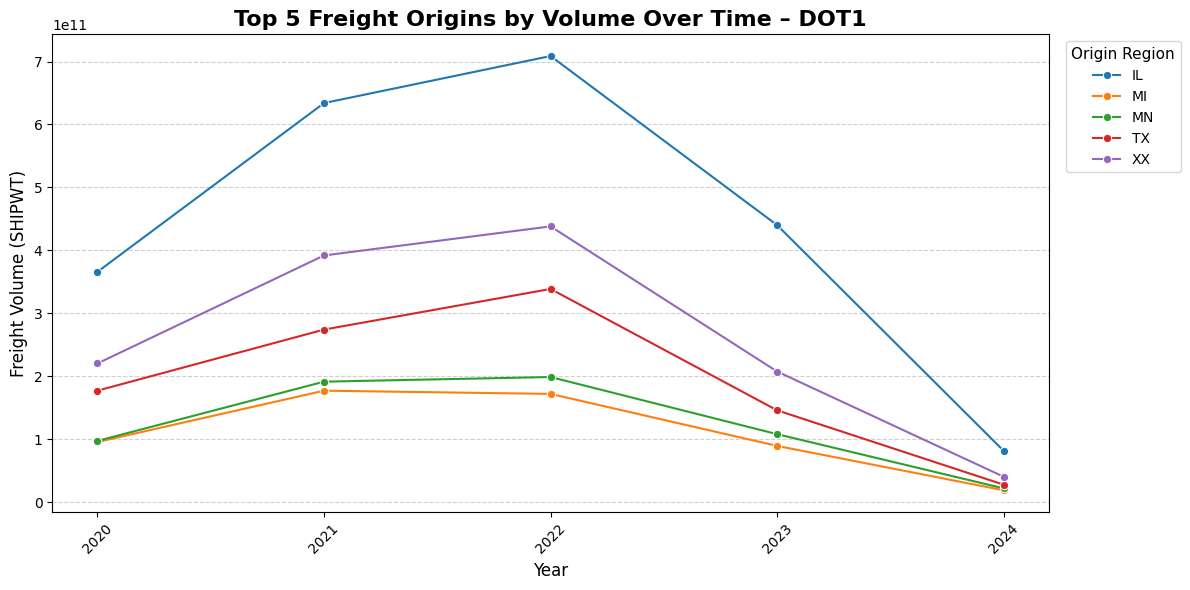

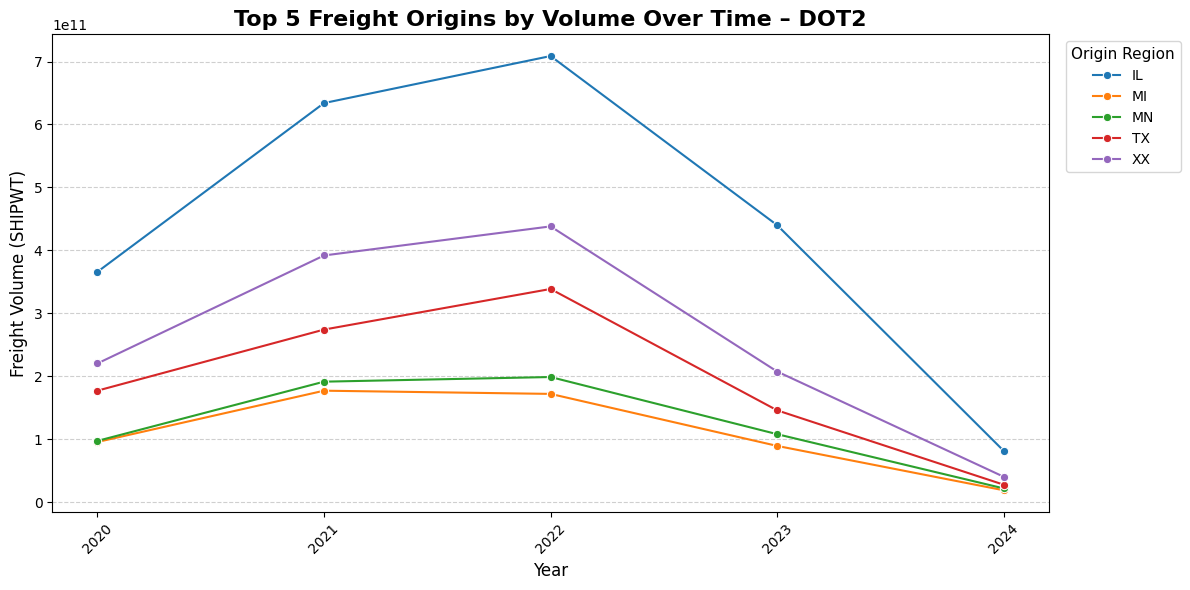

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_top_od_corridors(file, title, top_n=5, chunk_size=100_000):
    cols = ['USASTATE', 'CANPROV', 'MEXSTATE', 'COUNTRY', 'YEAR', 'SHIPWT']
    od_data = pd.DataFrame()

    for chunk in pd.read_csv(file, usecols=cols, chunksize=chunk_size, low_memory=False):
        chunk.dropna(subset=['COUNTRY', 'YEAR', 'SHIPWT'], inplace=True)
        chunk['YEAR'] = chunk['YEAR'].astype(int)
        chunk['SHIPWT'] = pd.to_numeric(chunk['SHIPWT'], errors='coerce')
        chunk.dropna(subset=['SHIPWT'], inplace=True)

        chunk['ORIGIN'] = chunk.apply(
            lambda row: row['USASTATE'] if row['COUNTRY'] == 1220 and pd.notna(row['USASTATE'])
            else (row['CANPROV'] if row['COUNTRY'] == 124 and pd.notna(row['CANPROV'])
                  else row['MEXSTATE']),
            axis=1
        )
        chunk['ORIGIN'] = chunk['ORIGIN'].fillna('Unknown')
        chunk = chunk[chunk['ORIGIN'] != 'Unknown']


        od_group = (
            chunk.groupby(['ORIGIN', 'YEAR'])['SHIPWT']
            .sum()
            .reset_index()
        )
        od_data = pd.concat([od_data, od_group], ignore_index=True)

    # Aggregate across all chunks
    od_data = (
        od_data.groupby(['ORIGIN', 'YEAR'])['SHIPWT']
        .sum()
        .reset_index()
    )

    # Get top N origins by total volume
    top_origins = (
        od_data.groupby('ORIGIN')['SHIPWT']
        .sum()
        .nlargest(top_n)
        .index
    )
    top_od_data = od_data[od_data['ORIGIN'].isin(top_origins)]

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=top_od_data, x='YEAR', y='SHIPWT', hue='ORIGIN', marker='o')
    plt.title(f'Top {top_n} Freight Origins by Volume Over Time – {title}', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Freight Volume (SHIPWT)', fontsize=12)

    # Set x-axis ticks to unique integer years only
    unique_years = sorted(top_od_data['YEAR'].unique())
    plt.xticks(unique_years, fontsize=10, rotation=45)

    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Origin Region', title_fontsize=11, fontsize=10, bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
   
analyze_top_od_corridors('deduped_dot1.csv', 'DOT1')
analyze_top_od_corridors('deduped_dot2.csv', 'DOT2')




4. Are there inefficiencies or cost anomalies in freight transport, such as unusually high freight charges relative to shipment weight or value?

DOT1 — Anomalies Detected: 922359 rows out of 4102985


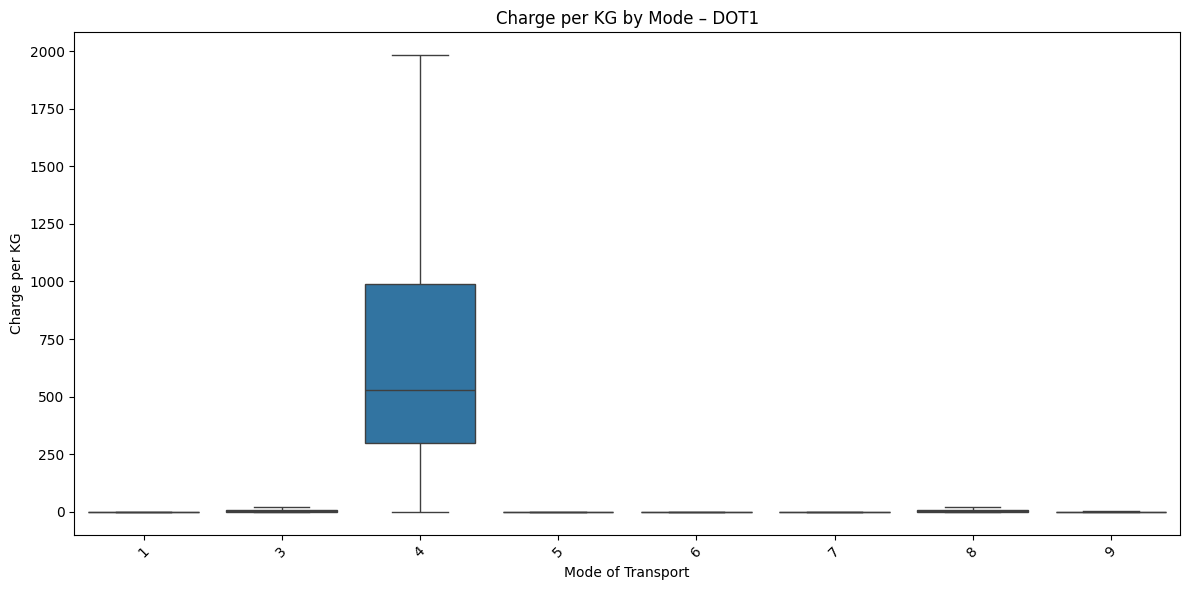

DOT2 — Anomalies Detected: 2100481 rows out of 9014887


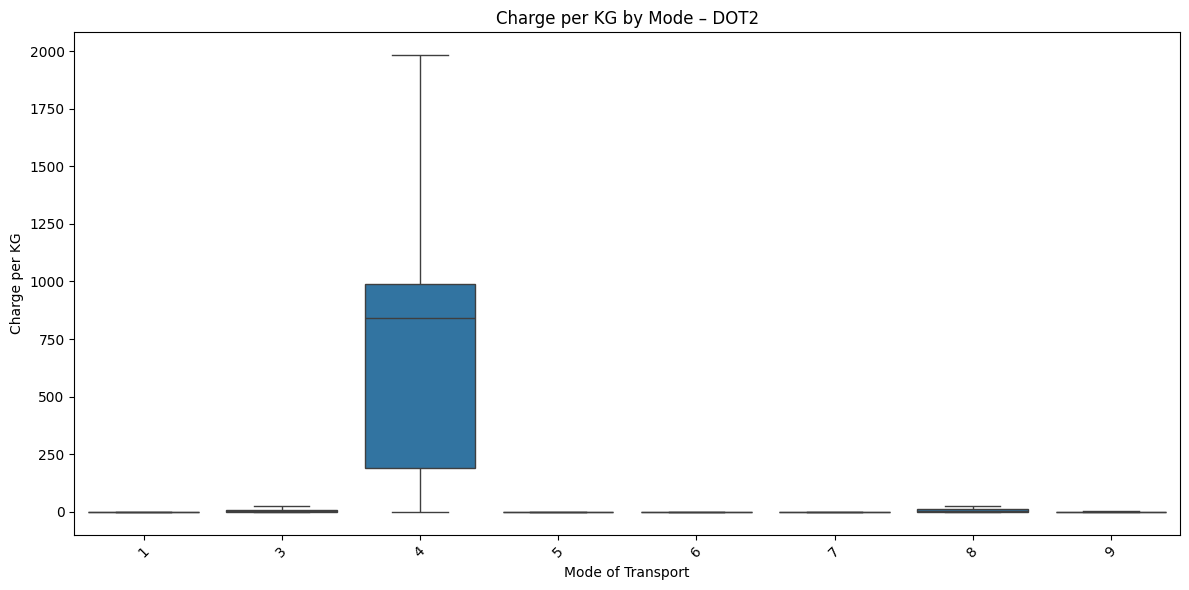

DOT3 — Anomalies Detected: 637354 rows out of 2780610


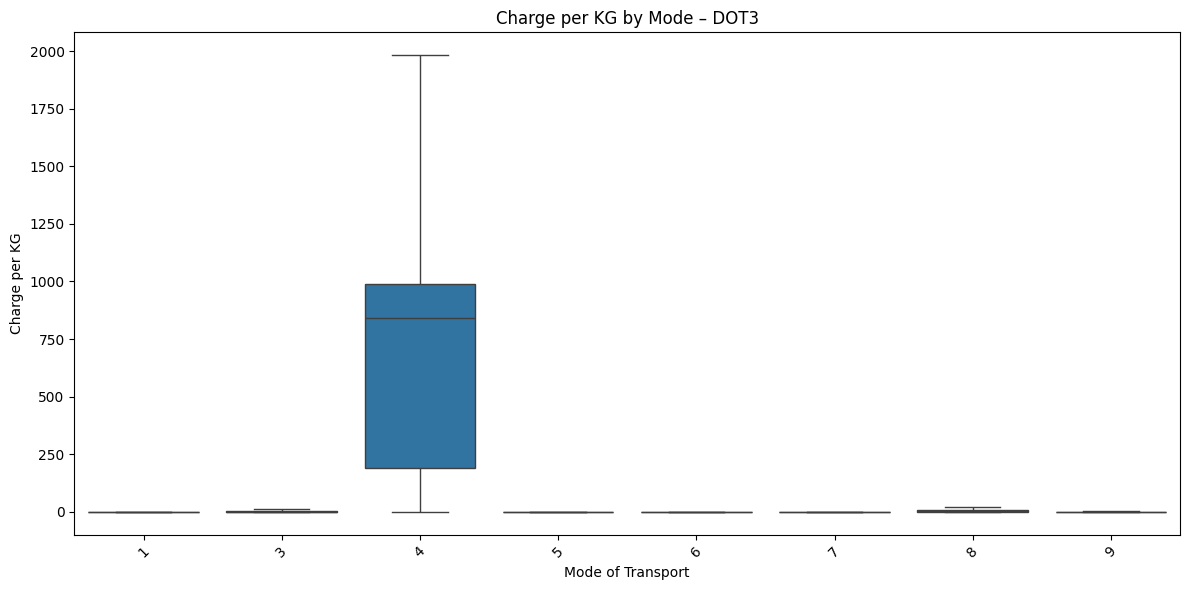

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_cost_anomalies(file, title, chunk_size=100000):
    cols = ['FREIGHT_CHARGES', 'SHIPWT', 'VALUE', 'YEAR', 'DISAGMOT']
    data = []

    for chunk in pd.read_csv(file, usecols=cols, chunksize=chunk_size, low_memory=False):
        chunk = chunk.dropna(subset=['FREIGHT_CHARGES', 'SHIPWT', 'VALUE', 'YEAR'])
        chunk = chunk[(chunk['SHIPWT'] > 0) & (chunk['VALUE'] > 0)]

        # Calculate charge ratios
        chunk['Charge_per_kg'] = chunk['FREIGHT_CHARGES'] / chunk['SHIPWT']
        chunk['Charge_per_dollar'] = chunk['FREIGHT_CHARGES'] / chunk['VALUE']
        chunk['YEAR'] = chunk['YEAR'].astype(int)

        data.append(chunk)

    df = pd.concat(data)

    # Use IQR to detect anomalies in Charge_per_kg
    def flag_anomalies(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        return (series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))

    df['Charge_per_kg_anomaly'] = flag_anomalies(df['Charge_per_kg'])
    df['Charge_per_dollar_anomaly'] = flag_anomalies(df['Charge_per_dollar'])

    # Summary
    anomalies = df[df['Charge_per_kg_anomaly'] | df['Charge_per_dollar_anomaly']]
    print(f"{title} — Anomalies Detected: {len(anomalies)} rows out of {len(df)}")

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='DISAGMOT', y='Charge_per_kg', showfliers=False)
    plt.title(f'Charge per KG by Mode – {title}')
    plt.ylabel('Charge per KG')
    plt.xlabel('Mode of Transport')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return anomalies[['YEAR', 'DISAGMOT', 'FREIGHT_CHARGES', 'SHIPWT', 'VALUE', 'Charge_per_kg', 'Charge_per_dollar']].sort_values(by='Charge_per_kg', ascending=False).head(20)
 
df_dot1_anomalies = detect_cost_anomalies('deduped_dot1.csv', 'DOT1')
df_dot2_anomalies = detect_cost_anomalies('deduped_dot2.csv', 'DOT2')
df_dot3_anomalies = detect_cost_anomalies('deduped_dot3.csv', 'DOT3')



5. Which commodities have seen the most growth or decline in freight volume in the past 5 years?

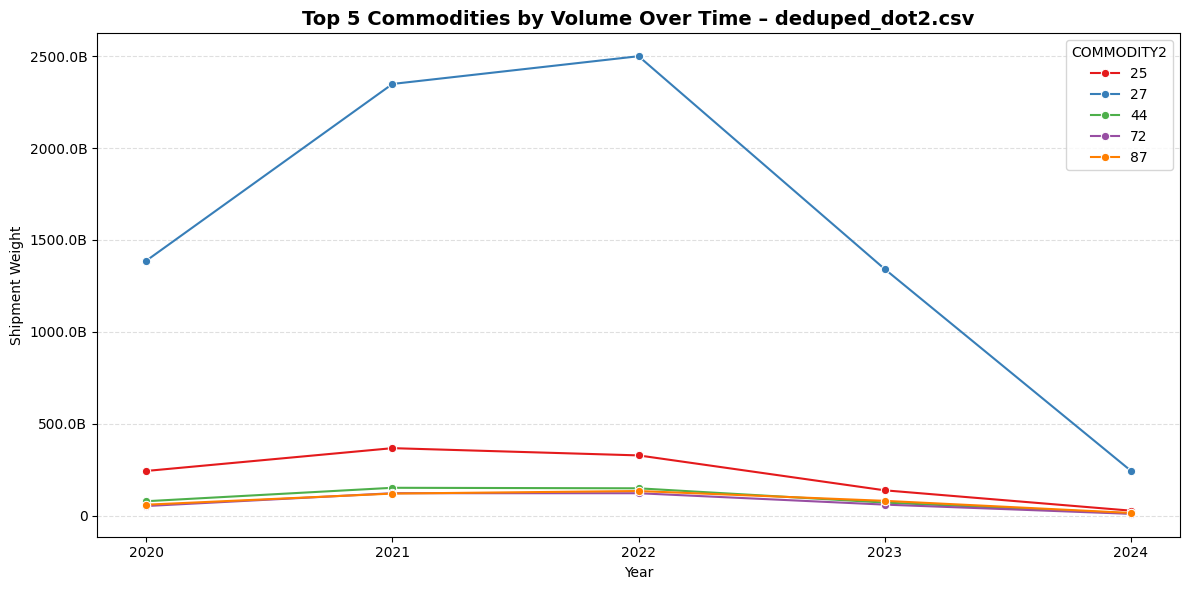

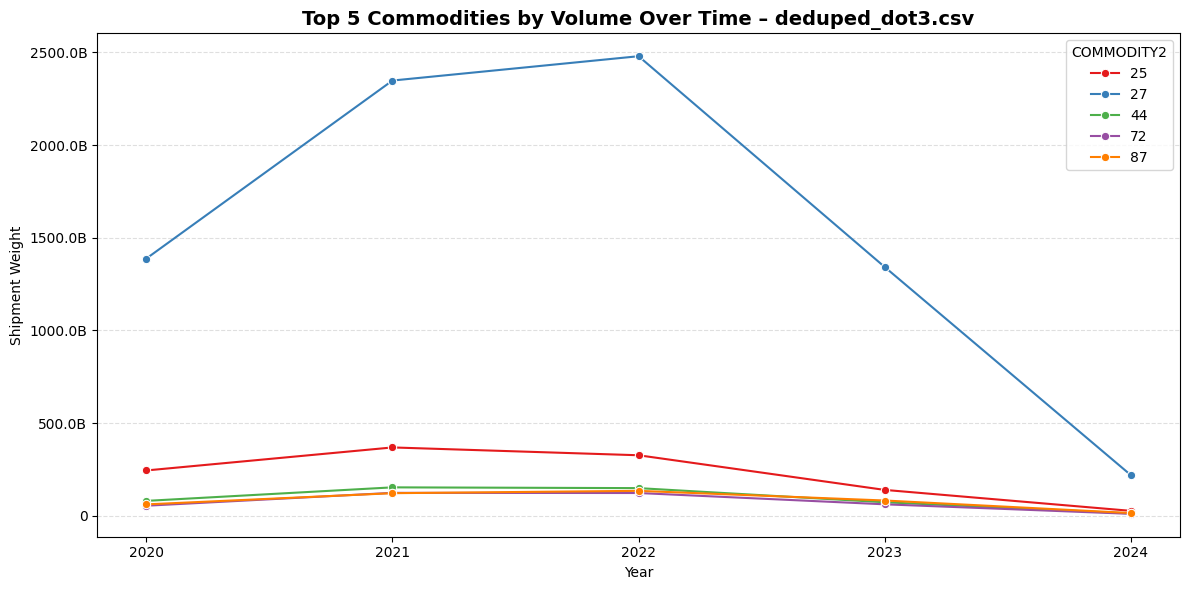

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

def format_large_ticks(x, _):
    """Format large numbers for y-axis labels (e.g., 1K, 1M, 1B)."""
    if x >= 1e9:
        return f'{x / 1e9:.1f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.1f}K'
    else:
        return str(int(x))

def top_commodity_trends(file):
    df = pd.read_csv(file, usecols=['YEAR', 'COMMODITY2', 'SHIPWT'])
    df.dropna(subset=['YEAR', 'COMMODITY2', 'SHIPWT'], inplace=True)

    # Convert types
    df['YEAR'] = df['YEAR'].astype(int)
    df['SHIPWT'] = pd.to_numeric(df['SHIPWT'], errors='coerce')
    df.dropna(subset=['SHIPWT'], inplace=True)

    # Get top 5 commodities
    totals = df.groupby('COMMODITY2')['SHIPWT'].sum().sort_values(ascending=False)
    top5 = totals.head(5).index.tolist()

    # Filter
    top_df = df[df['COMMODITY2'].isin(top5)]
    trend = top_df.groupby(['YEAR', 'COMMODITY2'])['SHIPWT'].sum().reset_index()

    # Plot
    plt.figure(figsize=(12, 6))
    palette = sns.color_palette('Set1', n_colors=5)
    ax = sns.lineplot(data=trend, x='YEAR', y='SHIPWT', hue='COMMODITY2', marker='o', palette=palette)

    # Apply formatted y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(format_large_ticks))

    # Ensure only full years on x-axis
    unique_years = sorted(trend['YEAR'].unique())
    ax.set_xticks(unique_years)

    plt.title(f'Top 5 Commodities by Volume Over Time – {file}', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Shipment Weight')
    plt.grid(True, axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

#  usage
top_commodity_trends('deduped_dot2.csv')
top_commodity_trends('deduped_dot3.csv')
